In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import math

from neo4j import GraphDatabase

fileName = "clamp_log - test#10 - H22"

df = pd.read_csv("%s.csv" %fileName,
                 dtype = {'Drilling UID': str, 'Time (µs)': int, 'T°': int, 'RPM': int, 'Spindle Amps (%)': float, 'Spindle Cmd (%)': float, 'Feed Pos. (µm)': int, 'Feed Amps (%)': float, 'Feed Cmd (%)': float, 'Clamp Pos. (µm)': int, 'Clamp Amps (%)': float, 'Clamp Cmd (%)': float})
                 
df.tail()

,Drilling UID,Time (µs),T°,RPM,Spindle Amps (%),Spindle Cmd (%),Feed Pos. (µm),Feed Amps (%),Feed Cmd (%),Clamp Pos. (µm),Clamp Amps (%),Clamp Cmd (%)
482,H22,2410000,48,2402,0.0,0.0,0,0.0,0.87,-6772,21.4,1.34
483,H22,2415000,48,2402,0.0,0.0,0,0.0,0.87,-6772,22.0,1.34
484,H22,2420000,48,2402,0.0,0.0,0,0.0,0.87,-6772,22.2,1.34
485,H22,2425000,48,2402,0.0,0.0,0,0.0,0.87,-6772,21.9,1.34
486,H22,2430000,49,2402,0.0,0.0,0,0.0,0.87,-6772,21.8,1.34


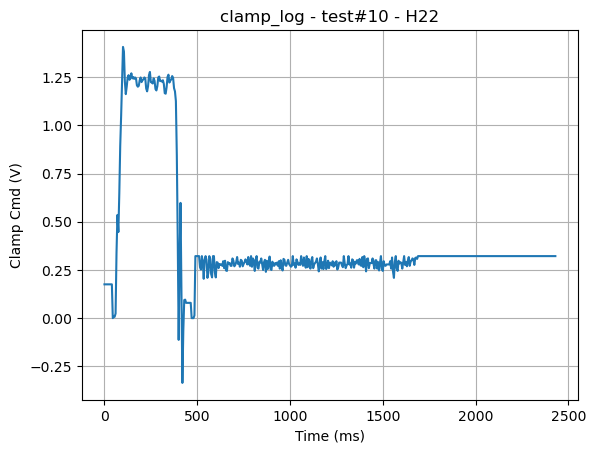

In [9]:
# Data for plotting
t = df['Time (µs)']/1000
s = df['Clamp Cmd (%)']*24/100

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Time (ms)', ylabel='Clamp Cmd (V)',
       title=fileName)
ax.grid()

fig.savefig("%s - Clamp Cmd.png" %fileName)
plt.show()

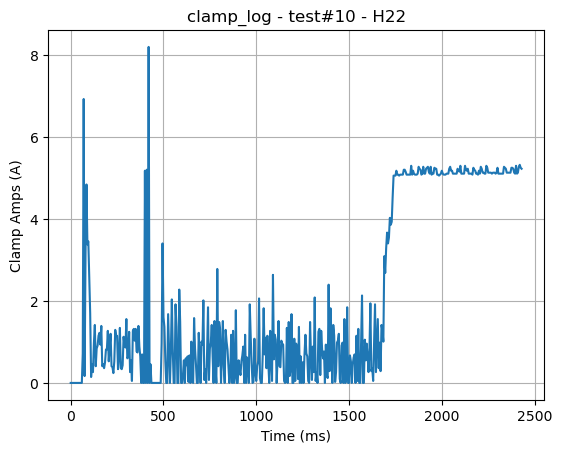

In [10]:
# Data for plotting
t = df['Time (µs)']/1000
s = df['Clamp Amps (%)']*24/100

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Time (ms)', ylabel='Clamp Amps (A)',
       title=fileName)
ax.grid()

fig.savefig("%s - Clamp Amps.png" %fileName)
plt.show()

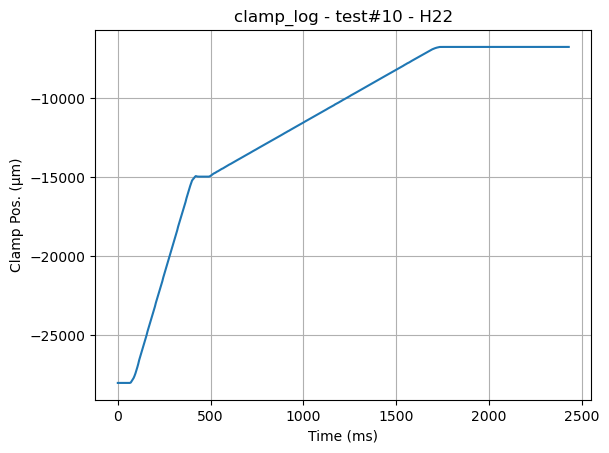

In [11]:
# Data for plotting
t = df['Time (µs)']/1000
s = df['Clamp Pos. (µm)']

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Time (ms)', ylabel='Clamp Pos. (µm)',
       title=fileName)
ax.grid()

fig.savefig("%s - Clamp Pos.png" %fileName)
plt.show()

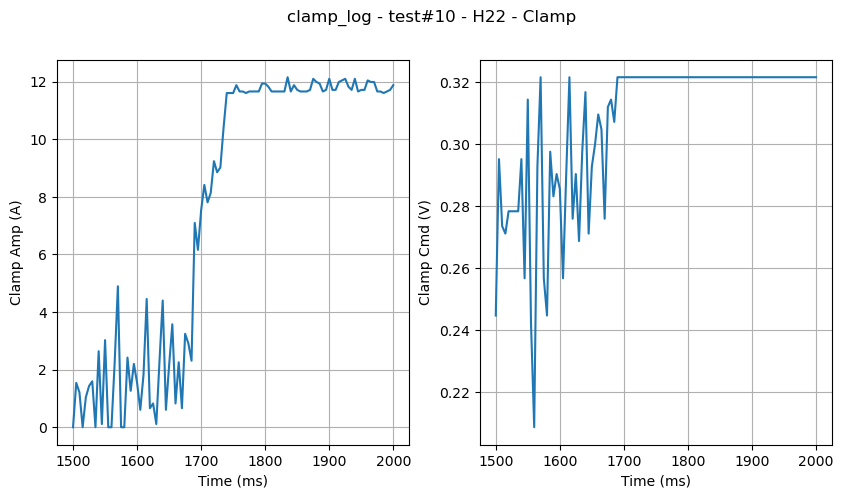

In [12]:
# Data for plotting
t = df.loc[300:400, 'Time (µs)']/1000
s1 = df.loc[300:400, 'Clamp Cmd (%)']*24/100
s2 = df.loc[300:400, 'Clamp Amps (%)']*55/100
s3 = df.loc[300:400, 'Clamp Pos. (µm)']

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

# axs[0].grid(True)
# axs[0].set(xlabel='Time (ms)', ylabel='Feed Cmd (V)')
# axs[0].plot(t,s1)

axs[0].grid(True)
axs[0].set(xlabel='Time (ms)', ylabel='Clamp Amp (A)')
axs[0].plot(t,s2)

axs[1].grid(True)
axs[1].set(xlabel='Time (ms)', ylabel='Clamp Cmd (V)')
axs[1].plot(t,s1)


fig.suptitle('%s - Clamp' %fileName)
fig.savefig("%s - Clamp.png" %fileName)